In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
#load model
modelname='saved_model_epoc10_20201201'
#modelname='saved_model_epoc15_20200811'
#modelname='../py/NNmodel/'
model = tf.keras.models.load_model(modelname)



#load images to test
data_dir ='test_photos'
#preprocess images
IMAGE_SIZE=(224,224)
BATCH_SIZE = 32 #@param {type:"integer"}
datagen_kwargs = dict(rescale=1./255)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
train_generator = datagen.flow_from_directory(
    data_dir, subset="training", shuffle=False, **dataflow_kwargs)


Found 16 images belonging to 2 classes.


In [8]:

#predict results
train_generator.reset()
pred=model.predict_generator(train_generator,verbose=1)

1/1 [==============================] - 2s 2s/step


In [9]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
filenames=train_generator.filenames

In [10]:
for i in range(len(pred)):
    print (filenames[i],labels[0],pred[i,0],labels[1],pred[i,1])

clear/02DBF5BA_F90B74C6_CAM1.jpg clear 0.999931 fog 0.024409652
clear/090VC06740.jpg clear 0.9992337 fog 0.037172973
clear/Ritzville4.jpg clear 0.97676224 fog 0.041594654
clear/SR2E.jpg clear 0.9999715 fog 0.027235866
clear/alpowa_medium.jpg clear 0.9996271 fog 0.025565505
clear/images (93).jpg clear 0.9019385 fog 0.117194
fog/5e4a5ea97cba6.image.jpg clear 0.04990372 fog 0.99434996
fog/920x920.jpg clear 0.051579535 fog 0.89695525
fog/CarDrivingHeavyFog-A_B.jpg clear 0.07143727 fog 0.9736208
fog/Dz7WqlAW0AESyT4.jpg clear 0.35366172 fog 0.18288681
fog/download.jpeg clear 0.047670573 fog 0.40734473
fog/gallery_large.jpg clear 0.034353644 fog 0.9894515
fog/images (1).jpg clear 0.058725804 fog 0.95887667
fog/images (92).jpg clear 0.025043607 fog 0.6275235
fog/images - 2020-02-27T142418.481.jpg clear 0.48007575 fog 0.09732205
fog/wx+cam.jpeg clear 0.055459023 fog 0.92052495


Image batch shape:  (16, 224, 224, 3)
Label batch shape:  (16, 2)


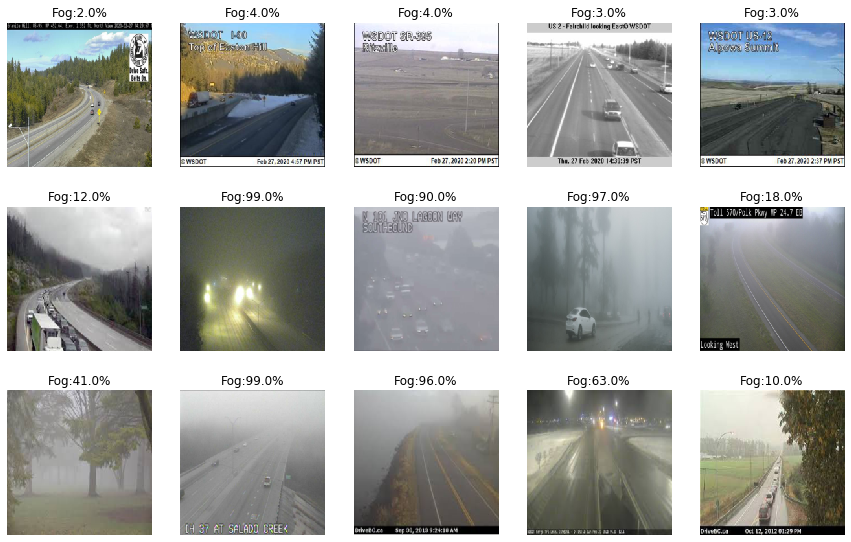

In [11]:
for image_batch, label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.1)
for n in range(15):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title("Fog:"+str(round(pred[n,1]*100,0))+"%")
  plt.axis('off')